In [66]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df_train = pd.read_csv('train.csv')

In [69]:
sns.set_style("whitegrid")


In [70]:
print("\nEducation Distribution: Count")
print(df_train['Education'].value_counts())


Education Distribution: Count
Education
Graduate                 531
Post Graduate            432
12th Pass                349
Graduate Professional    339
10th Pass                227
8th Pass                  78
Doctorate                 52
Others                    28
Literate                  14
5th Pass                   9
Name: count, dtype: int64


In [71]:
df_train['Total Assets'] = df_train['Total Assets'].apply(lambda x: float(x.split()[0]) if isinstance(x, str) and 'Crore+' in x else float(x.split()[0]) * 0.01 if isinstance(x, str) and 'Lac+' in x else float(x.split()[0]) * 0.0001 if isinstance(x, str) and 'Thou+' in x else float(x.split()[0]) * 0.00001 if isinstance(x, str) and 'Hund+' in x else 0)
df_train['Liabilities'] = df_train['Liabilities'].apply(lambda x: float(x.split()[0]) if isinstance(x, str) and 'Crore+' in x else float(x.split()[0]) * 0.01 if isinstance(x, str) and 'Lac+' in x else float(x.split()[0]) * 0.0001 if isinstance(x, str) and 'Thou+' in x else float(x.split()[0]) * 0.00001 if isinstance(x, str) and 'Hund+' in x else 0)


C:\Users\SHREY CHANDRA\AppData\Local\Temp\ipykernel_3900\971929092.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_total_assets.index, y=avg_total_assets.values, palette='viridis')


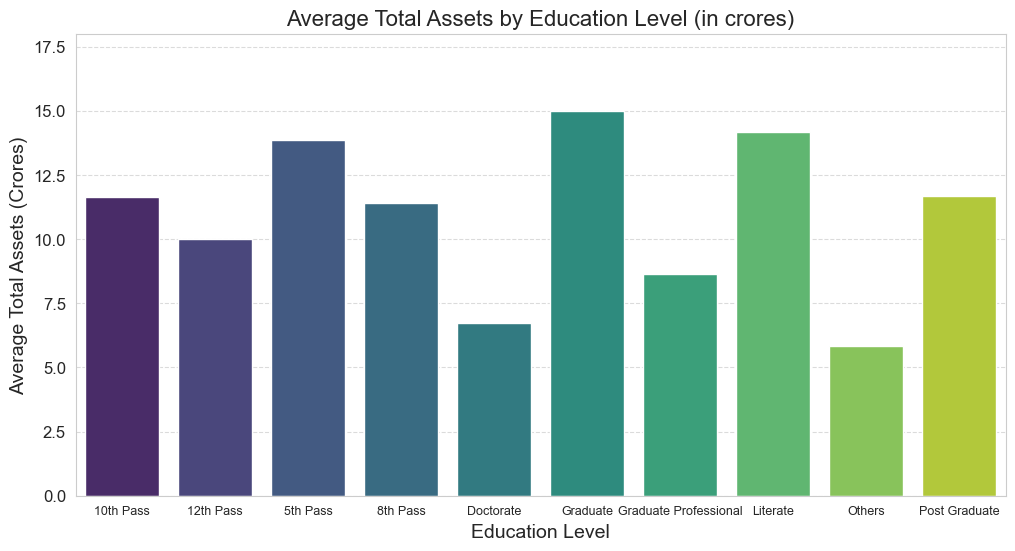

C:\Users\SHREY CHANDRA\AppData\Local\Temp\ipykernel_3900\971929092.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_liabilities.index, y=avg_liabilities.values, palette='viridis')


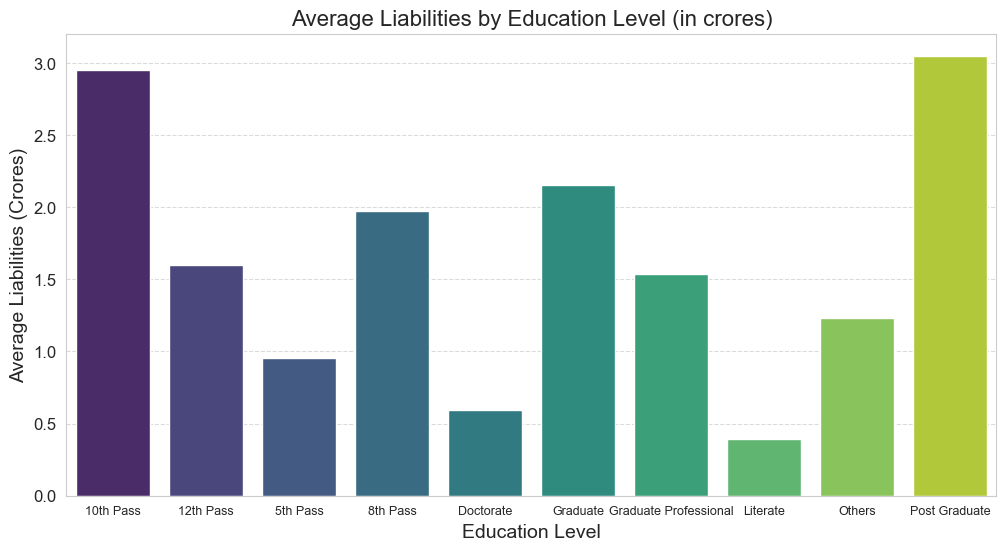

C:\Users\SHREY CHANDRA\AppData\Local\Temp\ipykernel_3900\971929092.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_criminal_records.index, y=avg_criminal_records.values, palette='viridis')


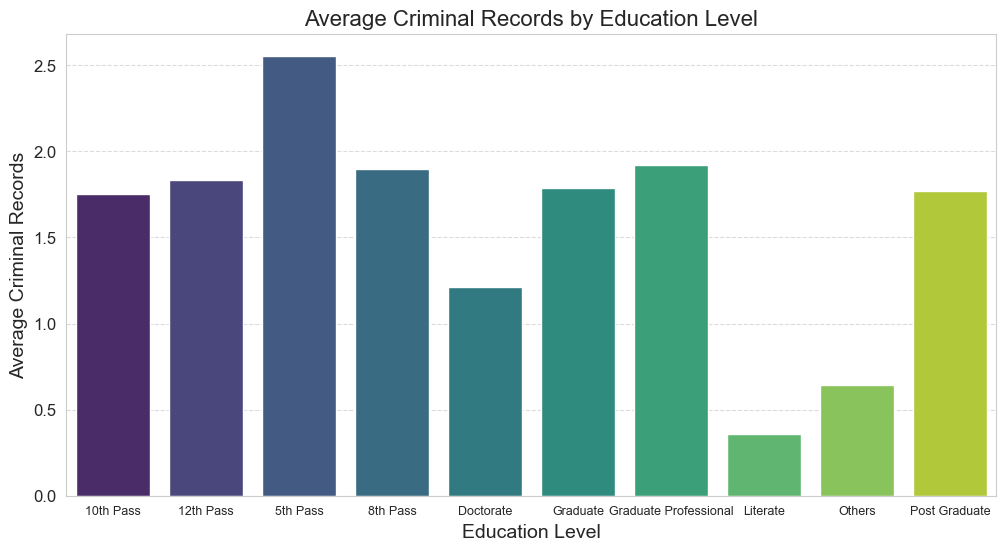

In [72]:
avg_total_assets = df_train.groupby('Education')['Total Assets'].mean()
avg_liabilities = df_train.groupby('Education')['Liabilities'].mean()
avg_criminal_records = df_train.groupby('Education')['Criminal Case'].mean()

y_min = 0
y_max = max(max(avg_total_assets.values), max(avg_liabilities.values), max(avg_criminal_records.values)) * 1.2

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_total_assets.index, y=avg_total_assets.values, palette='viridis')
plt.title('Average Total Assets by Education Level (in crores)', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Average Total Assets (Crores)', fontsize=14)
plt.xticks(fontsize=9)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(y_min, y_max)  
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_liabilities.index, y=avg_liabilities.values, palette='viridis')
plt.title('Average Liabilities by Education Level (in crores)', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Average Liabilities (Crores)', fontsize=14)
plt.xticks(fontsize=9)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_criminal_records.index, y=avg_criminal_records.values, palette='viridis')
plt.title('Average Criminal Records by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Average Criminal Records', fontsize=14)
plt.xticks(fontsize=9)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\SHREY CHANDRA\AppData\Local\Temp\ipykernel_3900\3703469286.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education', y='Total Assets', data=df_train, palette="viridis")


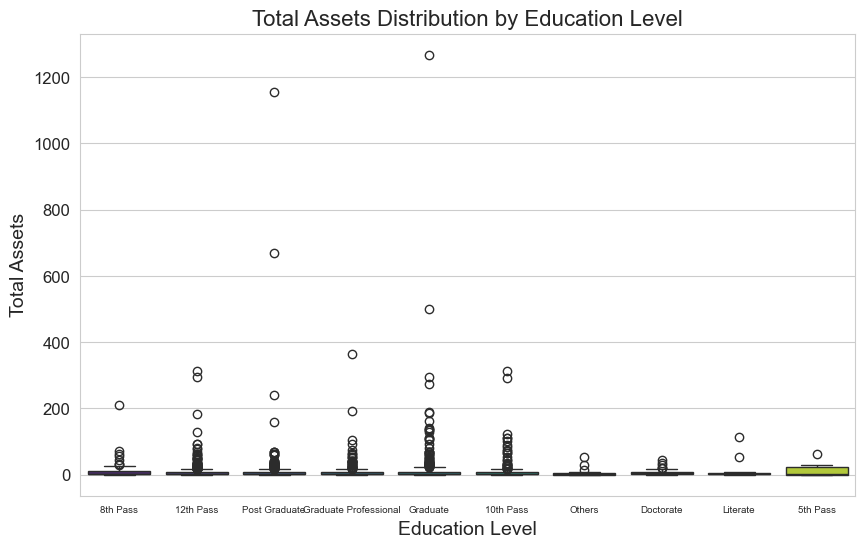

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Total Assets', data=df_train, palette="viridis")
plt.title('Total Assets Distribution by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Total Assets', fontsize=14)
plt.xticks(fontsize=7)
plt.yticks(fontsize=12)
plt.show()


C:\Users\SHREY CHANDRA\AppData\Local\Temp\ipykernel_3900\4090003069.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education', y='Liabilities', data=df_train, palette="viridis")


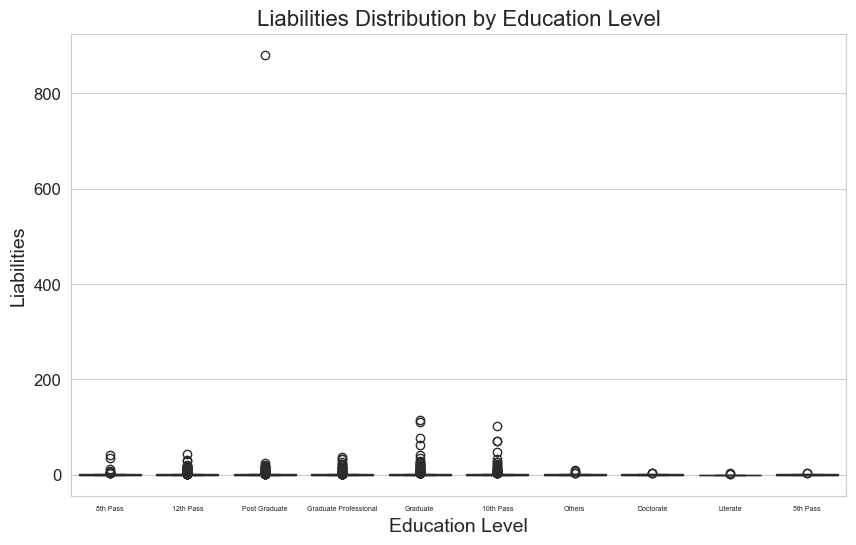

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Liabilities', data=df_train, palette="viridis")
plt.title('Liabilities Distribution by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Liabilities', fontsize=14)
plt.xticks(fontsize=5)
plt.yticks(fontsize=12)
plt.show()

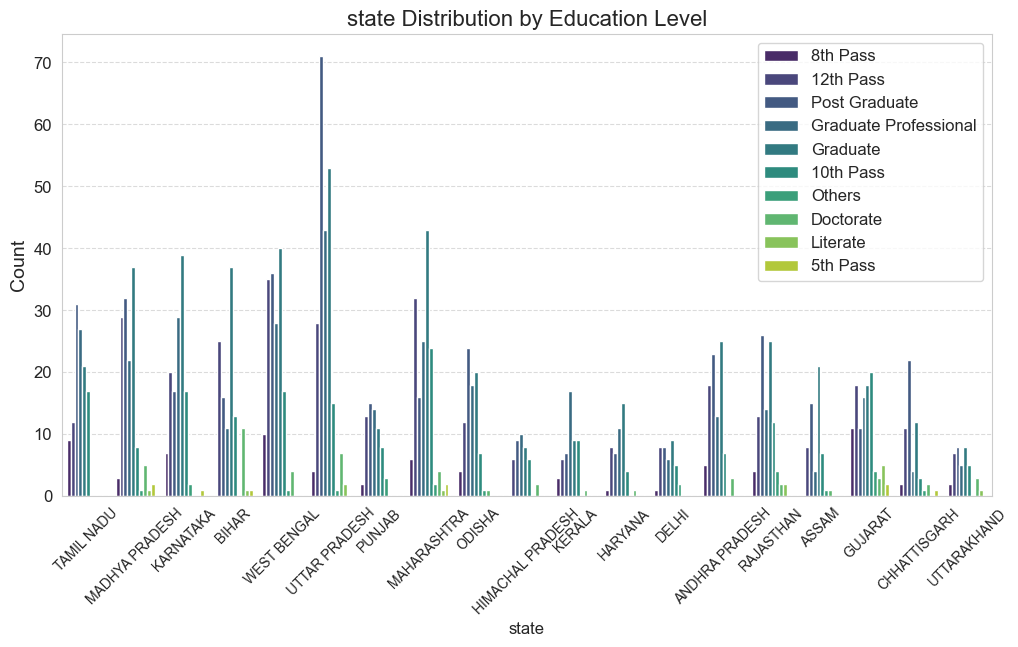

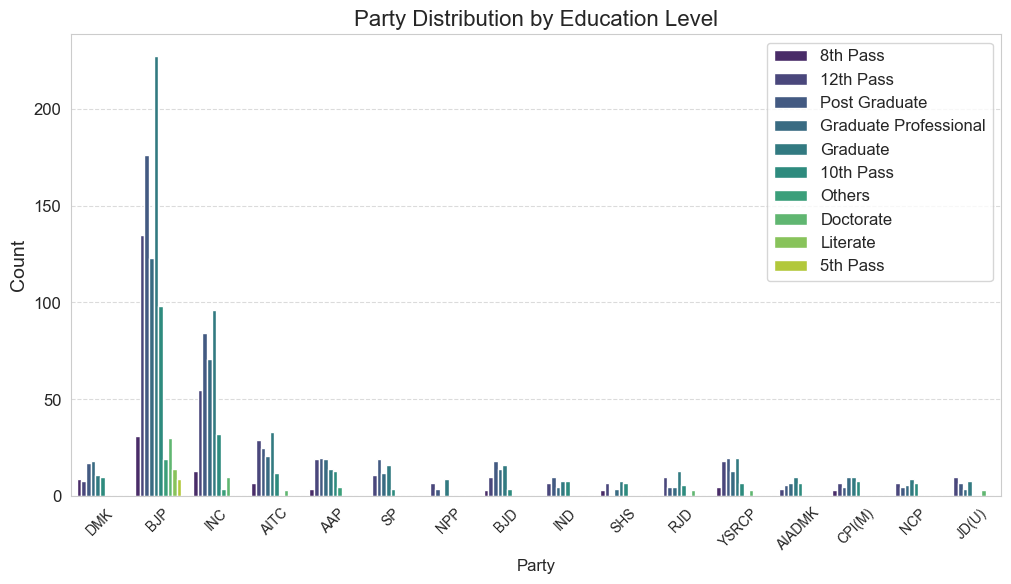

In [75]:
def plot_top_categories(df, feature, top_n=0.7):
    top_categories = df[feature].value_counts(normalize=True).head(int(len(df[feature].unique()) * top_n)).index
    
    filtered_df = df[df[feature].isin(top_categories)]
    
    plt.figure(figsize=(12, 6))
    sns.countplot(data=filtered_df, x=feature, hue='Education', palette='viridis')
    
    plt.title(f'{feature} Distribution by Education Level', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_top_categories(df_train, 'state')
plot_top_categories(df_train, 'Party')